Least Squares Regression 
In an earlier section, we developed formulas for the slope and intercept of the regression line through a football shaped scatter diagram. It turns out that the slope and intercept of the least squares line have the same formulas as those we developed, regardless of the shape of the scatter plot.

We saw this in the example about Little Women, but let's confirm it in an example where the scatter plot clearly isn't football shaped. For the data, we are once again indebted to the rich data archive of Prof. Larry Winner of the University of Florida. A 2013 study in the International Journal of Exercise Science studied collegiate shot put athletes and examined the relation between strength and shot put distance. The population consists of 28 female collegiate athletes. Strength was measured by the the biggest amount (in kilograms) that the athlete lifted in the "1RM power clean" in the pre-season. The distance (in meters) was the athlete's personal best.

In [1]:
import  pandas as pd
import numpy as np
import matplotlib.ticker as tick
import matplotlib.pyplot as plt
import pylab as pl
plt.style.use('fivethirtyeight')
import matplotlib.patches as mpatches
plt.style.use('fivethirtyeight')

In [2]:
shotput = pd.read_csv('shotput.csv')
shotput 

,Weight Lifted,Shot Put Distance
0,37.5,6.4
1,51.5,10.2
2,61.3,12.4
3,61.3,13.0
4,63.6,13.2
5,66.1,13.0
6,70.0,12.7
7,92.7,13.9
8,90.5,15.5
9,90.5,15.8


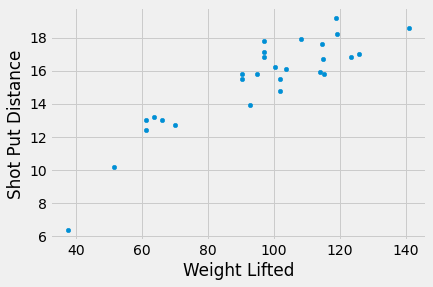

In [3]:
shotput.plot.scatter('Weight Lifted','Shot Put Distance')


In [4]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz)  
def fit(table, x, y):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table[x] + b


In [5]:
def correlation(t, label_x, label_y):
    
    return np.mean(standard_units(t[label_x])*standard_units(t[label_y]))
def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t[label_y])/np.std(t[label_x])

def intercept(t, label_x, label_y):
    return np.mean(t[label_y]) - slope(t, label_x, label_y)*np.mean(t[label_x])

That's not a football shaped scatter plot. In fact, it seems to have a slight non-linear component. But if we insist on using a straight line to make our predictions, there is still one best straight line among all straight lines.

Our formulas for the slope and intercept of the regression line, derived for football shaped scatter plots, give the following values.

In [6]:
slope(shotput, 'Weight Lifted', 'Shot Put Distance')

0.09834382159781994

In [7]:
intercept(shotput, 'Weight Lifted', 'Shot Put Distance')

5.959629098373956

Does it still make sense to use these formulas even though the scatter plot isn't football shaped? We can answer this by finding the slope and intercept of the line that minimizes the mse.

We will define the function shotput_linear_mse to take an arbirtary slope and intercept as arguments and return the corresponding mse. Then minimize applied to shotput_linear_mse will return the best slope and intercept.

In [8]:
def shotput_linear_mse(any_slope, any_intercept):
    x = shotput['Weight Lifted']
    y = shotput['Shot Put Distance']
    fitted = any_slope*x + any_intercept
    return np.mean((y - fitted) ** 2)

In [9]:
import functools
from scipy import optimize

In [10]:
def minimize(f, start=None, smooth=False, log=None, array=False, **vargs):
    """Minimize a function f of one or more arguments.

    Args:
        f: A function that takes numbers and returns a number

        start: A starting value or list of starting values

        smooth: Whether to assume that f is smooth and use first-order info

        log: Logging function called on the result of optimization (e.g. print)

        vargs: Other named arguments passed to scipy.optimize.minimize

    Returns either:
        (a) the minimizing argument of a one-argument function
        (b) an array of minimizing arguments of a multi-argument function
    """
    if start is None:
        assert not array, "Please pass starting values explicitly when array=True"
        arg_count = f.__code__.co_argcount
        assert arg_count > 0, "Please pass starting values explicitly for variadic functions"
        start = [0] * arg_count
    if not hasattr(start, '__len__'):
        start = [start]

    if array:
        objective = f
    else:
        @functools.wraps(f)
        def objective(args):
            return f(*args)

    if not smooth and 'method' not in vargs:
        vargs['method'] = 'Powell'
    result = optimize.minimize(objective, start, **vargs)
    if log is not None:
        log(result)
    if len(start) == 1:
        return result.x.item(0)
    else:
        return result.x


In [11]:
minimize(shotput_linear_mse)

array([0.09834382, 5.9596291 ])

These values are the same as those we got by using our formulas. To summarize:

No matter what the shape of the scatter plot, there is a unique line that minimizes the mean squared error of estimation. It is called the regression line, and its slope and intercept are given by

slope of the regression line = r⋅SD of ySD of x
 
intercept of the regression line = average of y − slope⋅average of x

In [12]:
fitted = fit(shotput, 'Weight Lifted', 'Shot Put Distance')
shotput['Best Straight Line']=fitted
shotput

,Weight Lifted,Shot Put Distance,Best Straight Line
0,37.5,6.4,9.647522
1,51.5,10.2,11.024336
2,61.3,12.4,11.988105
3,61.3,13.0,11.988105
4,63.6,13.2,12.214296
5,66.1,13.0,12.460156
6,70.0,12.7,12.843697
7,92.7,13.9,15.076101
8,90.5,15.5,14.859745
9,90.5,15.8,14.859745


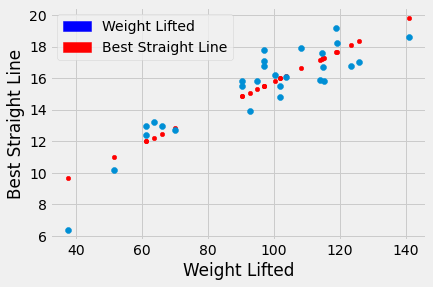

In [13]:
shotput.plot.scatter('Weight Lifted','Best Straight Line',color='red')
plt.scatter(shotput['Weight Lifted'],shotput['Shot Put Distance'])
red_patch = mpatches.Patch(color='red', label='Best Straight Line')
blue_patch = mpatches.Patch(color='blue', label='Weight Lifted ')
plt.legend(handles=[blue_patch,red_patch ])
plt.show()

## Nonlinear Regression 
The graph above reinforces our earlier observation that the scatter plot is a bit curved. So it is better to fit a curve than a straight line. The study postulated a quadratic relation between the weight lifted and the shot put distance. So let's use quadratic functions as our predictors and see if we can find the best one.

We have to find the best quadratic function among all quadratic functions, instead of the best straight line among all straight lines. The method of least squares allows us to do this.

The mathematics of this minimization is complicated and not easy to see just by examining the scatter plot. But numerical minimization is just as easy as it was with linear predictors! We can get the best quadratic predictor by once again using minimize. Let's see how this works.

Recall that a quadratic function has the form

f(x) = ax2+bx+c
 
for constants  a ,  b , and  c .

To find the best quadratic function to predict distance based on weight lifted, using the criterion of least squares, we will first write a function that takes the three constants as its arguments, calculates the fitted values by using the quadratic function above, and then returns the mean squared error.

The function is called shotput_quadratic_mse. Notice that the definition is analogous to that of lw_mse, except that the fitted values are based on a quadratic function instead of linear.

In [14]:
def shotput_quadratic_mse(a, b, c):
    x = shotput['Weight Lifted']
    y = shotput['Shot Put Distance']
    fitted = a*(x**2) + b*x + c
    return np.mean((y - fitted) ** 2)

We can now use minimize just as before to find the constants that minimize the mean squared error.

In [15]:
best = minimize(shotput_quadratic_mse)
best


array([-1.04004837e-03,  2.82708043e-01, -1.53182103e+00])

Our prediction of the shot put distance for an athlete who lifts  x  kilograms is about
−0.00104x2 + 0.2827x−1.5318
 
meters. For example, if the athlete can lift 100 kilograms, the predicted distance is 16.33 meters. On the scatter plot, that's near the center of a vertical strip around 100 kilograms.

In [16]:
(-0.00104)*(100**2) + 0.2827*100 - 1.5318

16.3382

Here are the predictions for all the values of Weight Lifted. You can see that they go through the center of the scatter plot, to a rough approximation.

In [17]:
x = shotput.iloc[:,0]
shotput_fit = best.item(0)*(x**2) + best.item(1)*x + best.item(2)

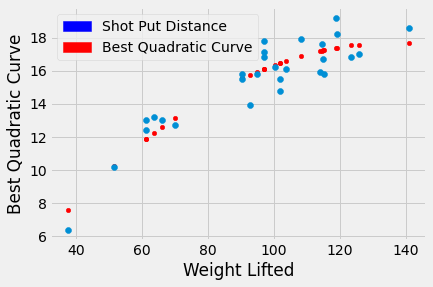

In [18]:
shotput['Best Quadratic Curve']= shotput_fit

shotput.plot.scatter('Weight Lifted','Best Quadratic Curve',color='red')

plt.scatter(shotput['Weight Lifted'],shotput['Shot Put Distance'])
red_patch = mpatches.Patch(color='red', label='Best Quadratic Curve')
blue_patch = mpatches.Patch(color='blue', label='Shot Put Distance ')
plt.legend(handles=[blue_patch,red_patch ])
plt.show()
